In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
dataset = pd.read_csv('sonar.csv')

In [ ]:
dataset.head()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(dataset.drop('R',axis=1))

StandardScaler()

In [ ]:
scaled_data = scaler.transform(dataset.drop('R',axis=1))

In [ ]:
scaled_data

array([[ 0.70018948,  0.42042142,  1.0529498 , ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [-0.13089402,  0.59942737,  1.71912994, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.83579208, -0.64754631,  0.48045125, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 1.00042384,  0.15949749, -0.67235266, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [ 0.0475061 , -0.09535845,  0.13434985, ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.13959647, -0.06501846, -0.78685237, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

In [ ]:
new_dataset = pd.DataFrame(scaled_data,columns=dataset.columns[:-1])
new_dataset

In [ ]:
x=scaled_data
y=dataset['R']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
ypred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           M       0.78      0.89      0.83        36
           R       0.82      0.67      0.73        27

    accuracy                           0.79        63
   macro avg       0.80      0.78      0.78        63
weighted avg       0.80      0.79      0.79        63

[[32  4]
 [ 9 18]]


In [ ]:
error_rates = []
import numpy as np
for i in range(1,40):
  Knn = KNeighborsClassifier(n_neighbors=i)
  Knn.fit(xtrain,ytrain)
  ypred = Knn.predict(xtest)
  error_rates.append(np.mean(ypred!=ytest))

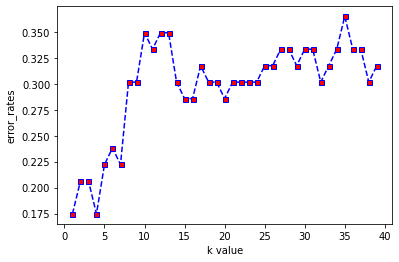

In [ ]:
plt.figure()
plt.xlabel("k value")
plt.ylabel("error_rates")
plt.plot(range(1,40),error_rates,color="blue",linestyle="dashed",marker="s",markerfacecolor="red" ,markersize=5)
plt.show()